# Exploratory Data Analysis - Data Story 

UniMiB SHAR - A New Dataset for Human Activity Recognition Using Acceleration Data from Smartphones. Made available by researchers of University of Milano-Bicohcca at http://www.sal.disco.unimib.it/technologies/unimib-shar/

The original dataset is in matlab format, so I used python scipy package to translate files to csv. Also used pandas to trasfrm the data into longform which is more suitable for analysis. The data is too large (49MB) to put in to GitHUB, so the code in this notebook won'r tun until the data is present. 

------------------------

#### Load modules and prepare environment

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### What the dataset is about?  

In [8]:
d = pd.DataFrame.from_csv('data_arranged_1.csv')
print 'total lengths' , len(d)
d.head()

total lengths 21039


,test_id,participant,activity_id,activity,type,axis,0,1,2,3,...,41,42,43,44,45,46,47,48,49,50
RowIndex,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,standing_up,ADL,a_x,-1.501732,-1.712306,-1.762136,-1.762136,...,7.609005,7.322882,7.281458,7.753253,8.043099,8.215854,8.388745,8.578034,8.658356,8.670648
1,0,1,0,standing_up,ADL,a_y,6.174088,6.208489,6.176518,6.332505,...,2.624527,3.084879,3.219505,3.194369,2.902520,2.099708,1.168218,0.830843,0.767005,0.592538
2,0,1,0,standing_up,ADL,a_z,-6.794761,-6.676965,-6.776717,-6.983081,...,-1.382157,-1.524102,-1.874934,-1.687926,-1.161328,-0.855452,-1.067564,-1.233163,-1.010148,-0.870438
3,1,1,0,standing_up,ADL,a_x,9.311694,9.015886,8.758092,8.751908,...,0.582395,0.802275,0.869482,0.027350,-0.885055,-1.567414,-2.137098,-1.851560,-1.092447,-0.668251
4,1,1,0,standing_up,ADL,a_y,-0.645795,-0.652516,-0.724883,-1.017775,...,4.379602,4.754490,5.301286,6.102784,6.941339,7.860902,8.762903,8.661006,7.717322,7.293978


The records are in the format of 3 lines per sample (3-projections of aceleartaion - to x, y, and z) 

In [7]:
print "Total samples: " + str(len(d)/3)

Total samples: 7013


Let's see how many different type of activities and data samples are available 

In [20]:
tests = d[d.axis=='a_x']
tests = tests[[0,1,2,3,4]]
tests.groupby('type').size()

type
ADL     5314
FALL    1699
dtype: int64

How many of theme are Activities of Daily Living ( ADL) and how many are simulated falls?  

What type of activities are recorded in data set and what type of falls ? 

In [11]:
tests.groupby(['type','activity']).size()

type  activity          
ADL   getting_up             218
      going_down             707
      going_up               651
      jumping                445
      lying_down             260
      running               1673
      sitting_down           180
      standing_up            159
      walking               1021
FALL  falling_back           233
      falling_chair          206
      falling_forward        195
      falling_left           206
      falling_obstacle       242
      falling_protection     194
      falling_right          221
      falling_syncope        202
dtype: int64

The data set has a good mix of the various records. 

### How does the data look like? 

Let's see how a single sample looks like..

In [18]:
df = pd.read_csv('out/data_long_form.csv',index_col = 0)

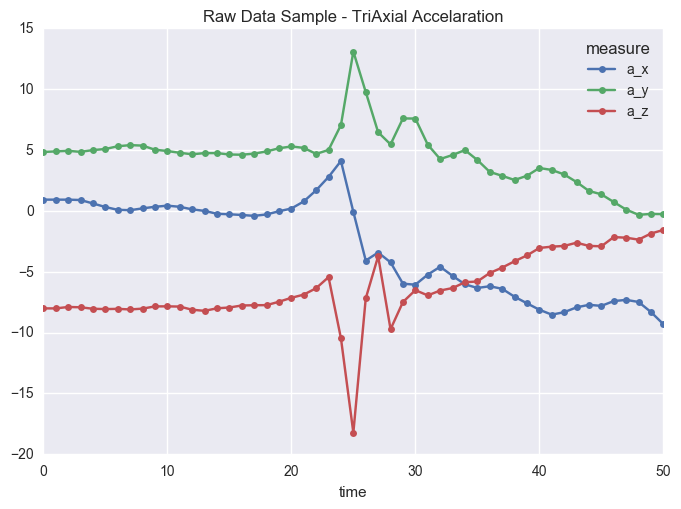

In [19]:
test_id = 5
data = df[df.test_id == test_id]
data = data[['measure', 'time', 'values']]
data = data.pivot(columns='measure', index='time', values='values')
data.plot(title = 'Raw Data Sample - TriAxial Accelaration', style = 'o-', markersize=5)

In [35]:
#ax.get_figure().savefig('plots/samplePlot.png')

### Plot accelaration samples: Can we visually differentiate between fall records and ADL records? 

In [24]:
df = pd.read_csv('out/data_long_form.csv',index_col = 0)
# get a list of tests and their info
tests = df[(df.measure == 'a_x') & (df.time == 0)]
tests = tests[['test_id', 'activity', 'type']]
tests['test_name'] = tests.activity.str.title() + ": sample " + tests.test_id.apply(str)
tests.head()

,test_id,activity,type,test_name
0,0,standing_up,ADL,Standing_Up: sample 0
204,1,standing_up,ADL,Standing_Up: sample 1
408,2,standing_up,ADL,Standing_Up: sample 2
612,3,standing_up,ADL,Standing_Up: sample 3
816,4,standing_up,ADL,Standing_Up: sample 4


## These how falls look like ....

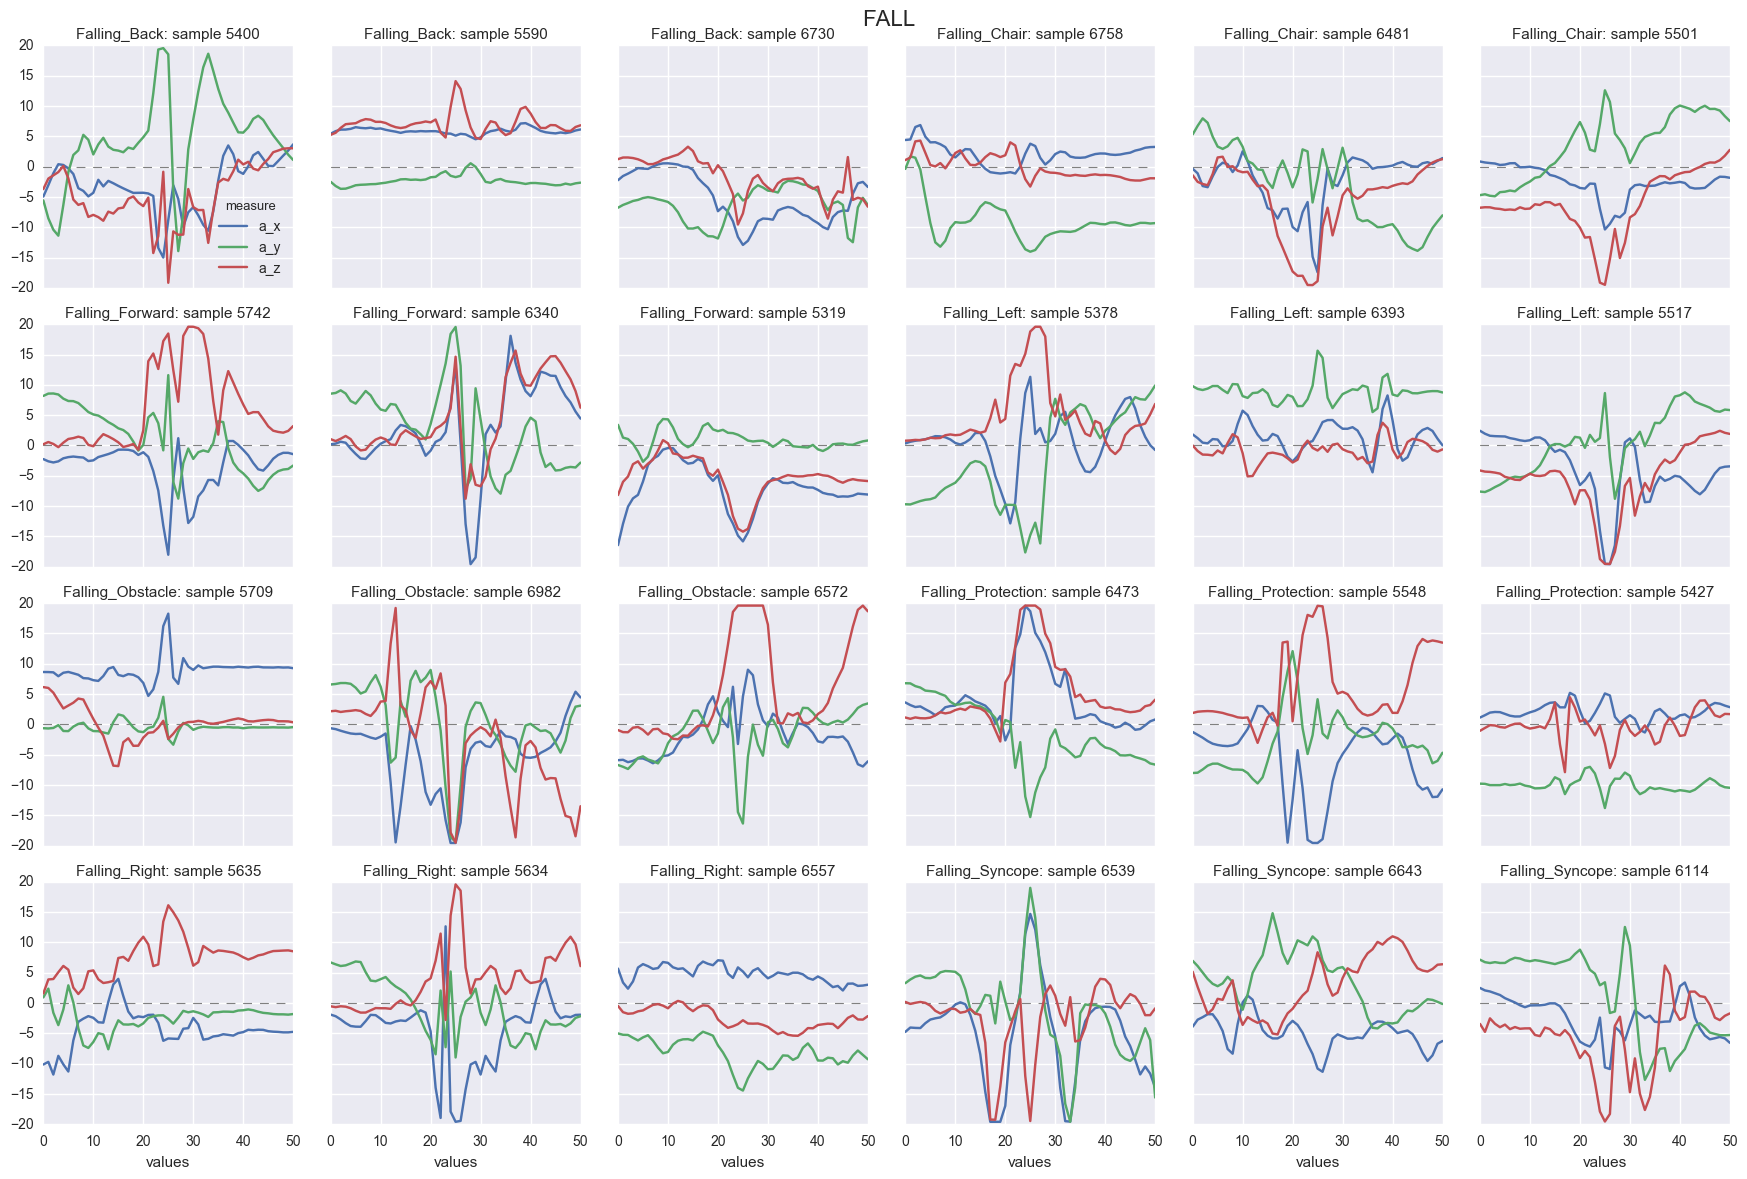

In [29]:
my_type = 'FALL'
num_samples = 3
plot_title = 'FALL'

d = tests[tests.type == my_type].groupby('activity').apply(lambda x: x.sample(num_samples))
data = d[['test_id', 'test_name']].merge(df, on = 'test_id')
# prepare grid
g = sns.FacetGrid(data, col = 'test_name', col_wrap = 6, hue = 'measure', 
                  size = 3, aspect = 1, ylim = [-20,20], legend_out=False)

# draw a horizontal line at 0
g.map(plt.axhline, y=0, c="0.5", lw = 0.75, ls ="--")
# plot 
g.map(plt.plot,'values')

# annotate with titles, legend and title on top
g.set_titles('{col_name}')
g.add_legend()

g.fig.subplots_adjust(wspace=.15, hspace=.15)
plt.subplots_adjust(top = 0.95)
g.fig.suptitle(plot_title,fontsize = 16)

## And these are Daily Actitivities

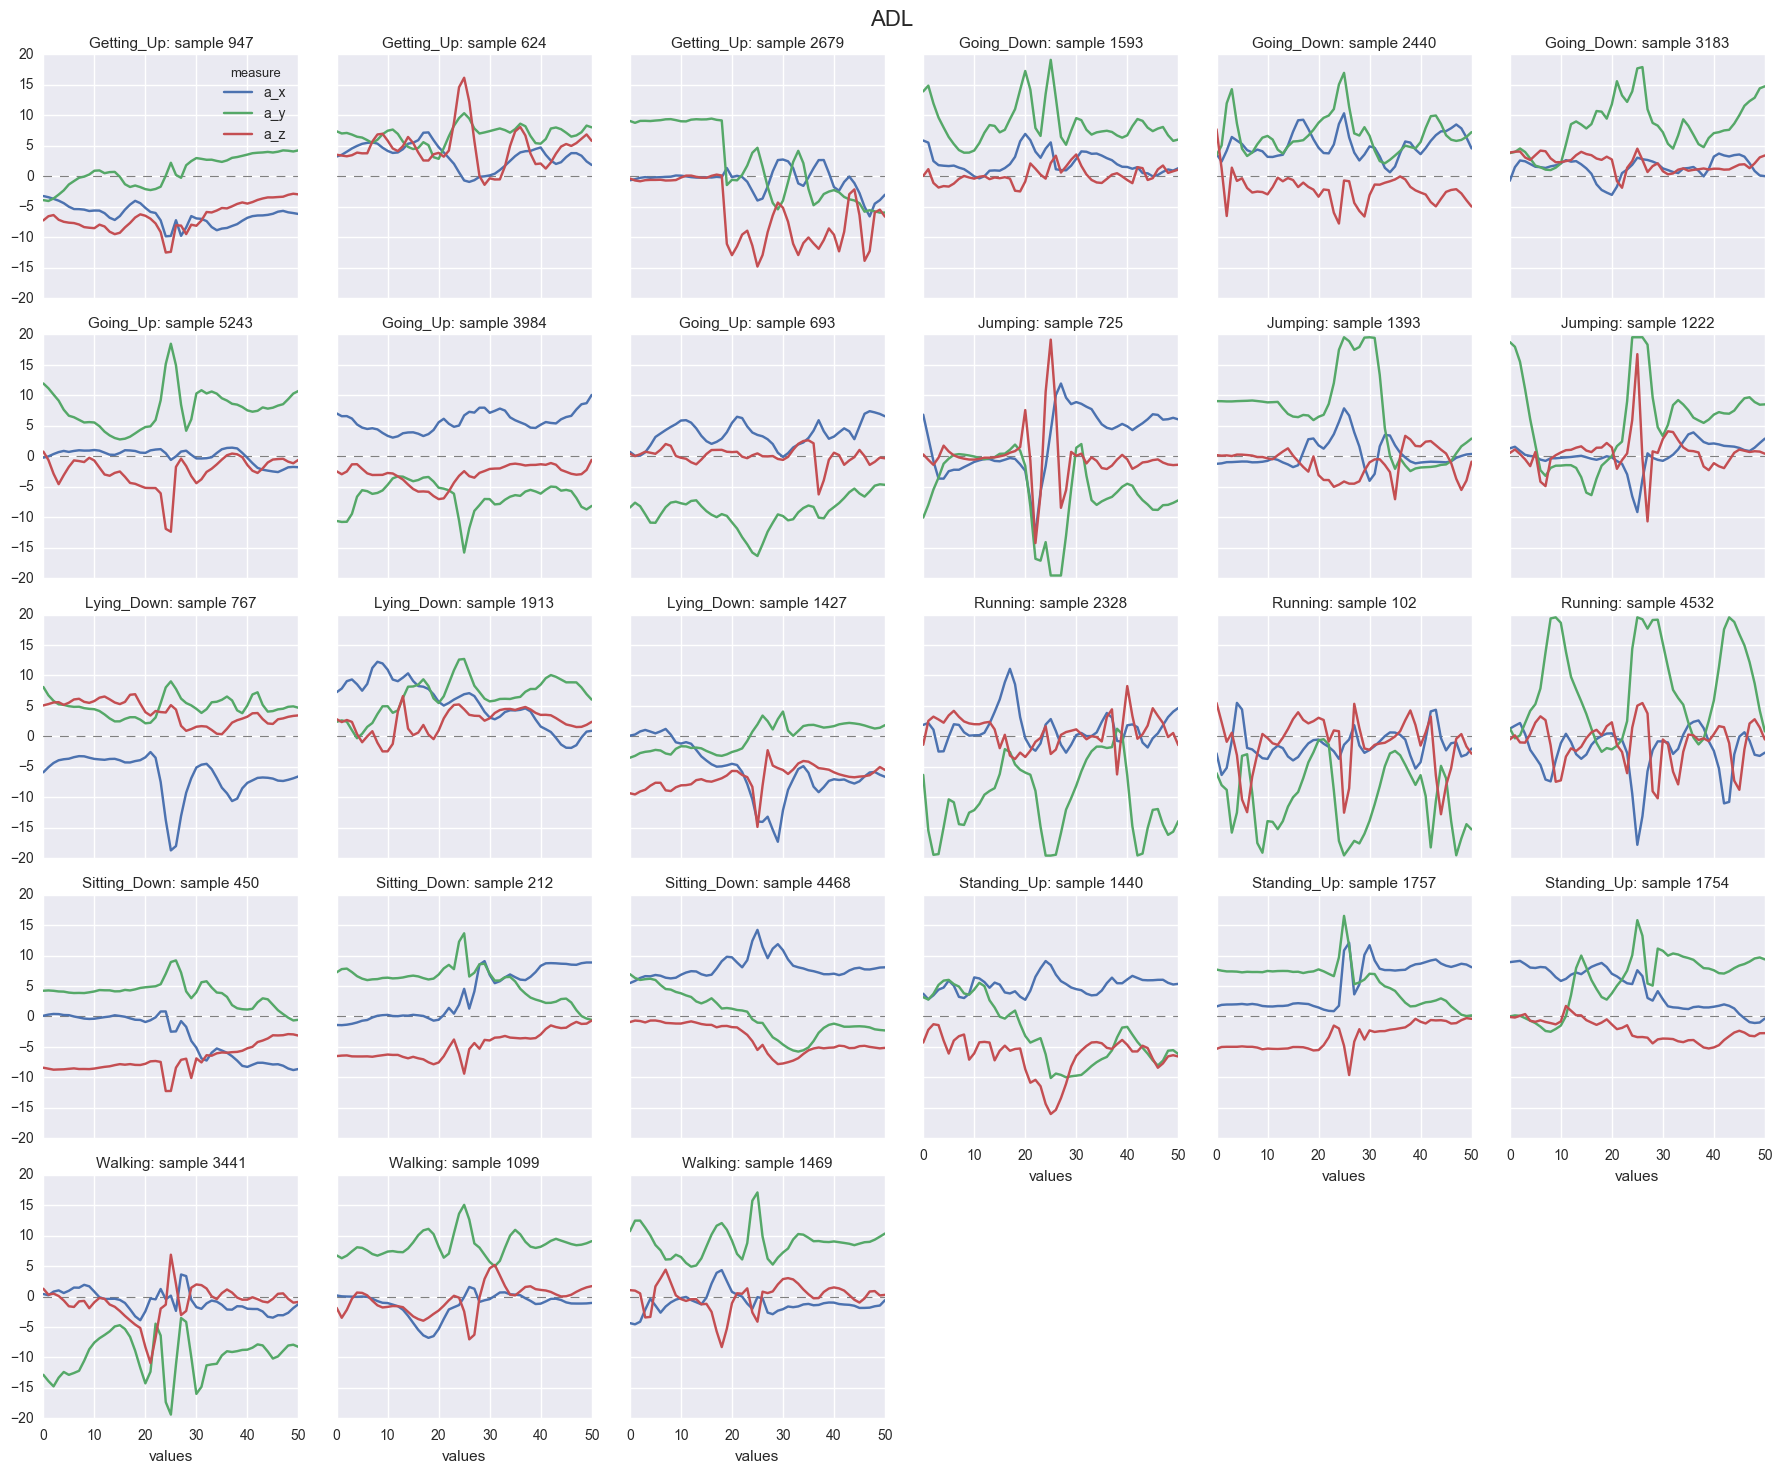

In [30]:
my_type = 'ADL'
num_samples = 3
plot_title = 'ADL'
d = tests[tests.type == my_type].groupby('activity').apply(lambda x: x.sample(num_samples))
data = d[['test_id', 'test_name']].merge(df, on = 'test_id')
# prepare grid
g = sns.FacetGrid(data, col = 'test_name', col_wrap = 6, hue = 'measure', 
                  size = 3, aspect = 1, ylim = [-20,20], legend_out=False)

# draw a horizontal line at 0
g.map(plt.axhline, y=0, c="0.5", lw = 0.75, ls ="--")
# plot 
g.map(plt.plot,'values')

# annotate with titles, legend and title on top
g.set_titles('{col_name}')
g.add_legend()

g.fig.subplots_adjust(wspace=.15, hspace=.15)
plt.subplots_adjust(top = 0.95)
g.fig.suptitle(plot_title,fontsize = 16)

### Can we see some difference in descriptive stats between ADL and Falls ? 

In [32]:
df = pd.read_csv('out/stats2.csv')
data = df[['fall', 'mean_x', 'mean_y', 'mean_z','std_x','std_y','std_z',
           'meandiff_x', 'meandiff_y', 'meandiff_z','vol_x','vol_y','vol_z']]
data.columns = ['fall', 'mean_x', 'mean_y', 'mean_z','stdev_x','stdev_y','stdev_z',
           'meandiff_x', 'meandiff_y', 'meandiff_z','stdevdiff_x','stdevdiff_y','stdevdiff_z']
data.head()

,fall,mean_x,mean_y,mean_z,stdev_x,stdev_y,stdev_z,meandiff_x,meandiff_y,meandiff_z,stdevdiff_x,stdevdiff_y,stdevdiff_z
0,0,3.266730,5.630226,-4.807679,4.158268,2.813486,2.560926,0.203448,-0.111631,0.118486,1.913802,1.995488,1.479079
1,0,3.629327,5.541744,-3.880594,3.691587,4.339937,2.266056,-0.199599,0.158795,-0.110793,0.706276,1.949549,0.889184
2,0,3.362532,5.861408,-4.778487,4.061633,2.881601,2.075421,0.198646,-0.136576,0.105766,1.988278,1.932588,1.368305
3,0,2.995170,5.629874,-5.482137,3.749535,2.363551,1.986514,0.216811,-0.140568,0.108789,0.726711,1.237760,0.785317
4,0,-2.296404,4.875306,-6.402479,3.859272,1.854574,2.703216,-0.280899,-0.070942,0.133656,0.884010,0.979603,1.841952


#### These are distrobution plots  for FALL variable ( 1 if Fall, 0 if ADL)  against mean and stdev in each axis x,y,z

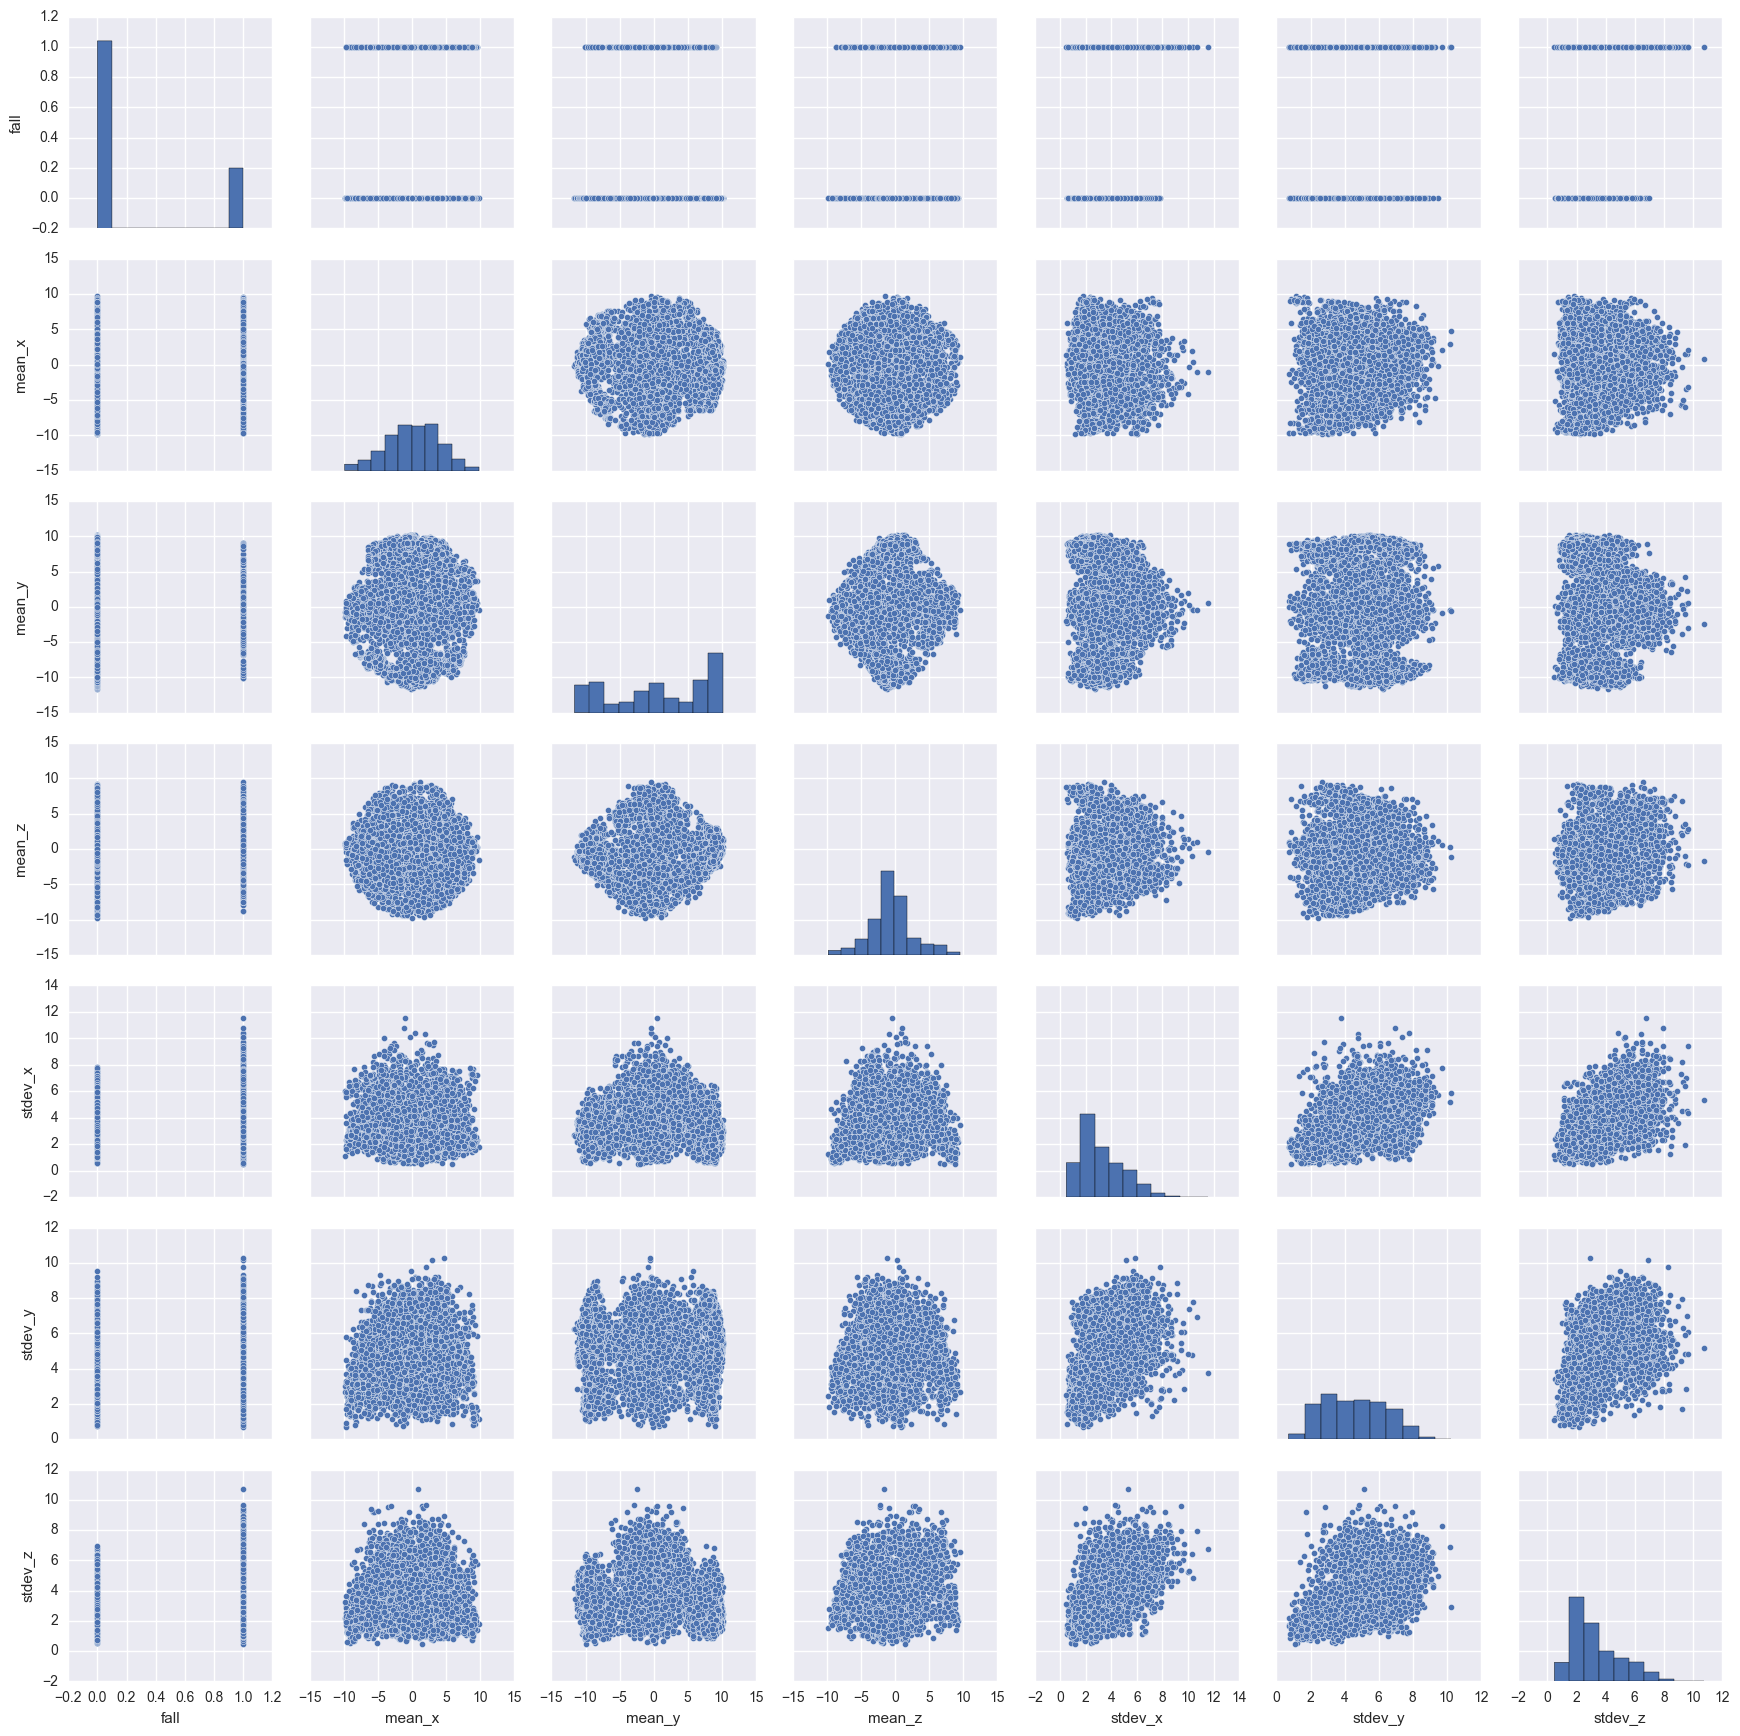

In [33]:
g = sns.pairplot(data[['fall', 'mean_x', 'mean_y', 'mean_z','stdev_x','stdev_y','stdev_z']])

Looks that there is some different patterns stdev_z - between falls and ADLs..Let's now see if anything shows up if we do differencing in time 

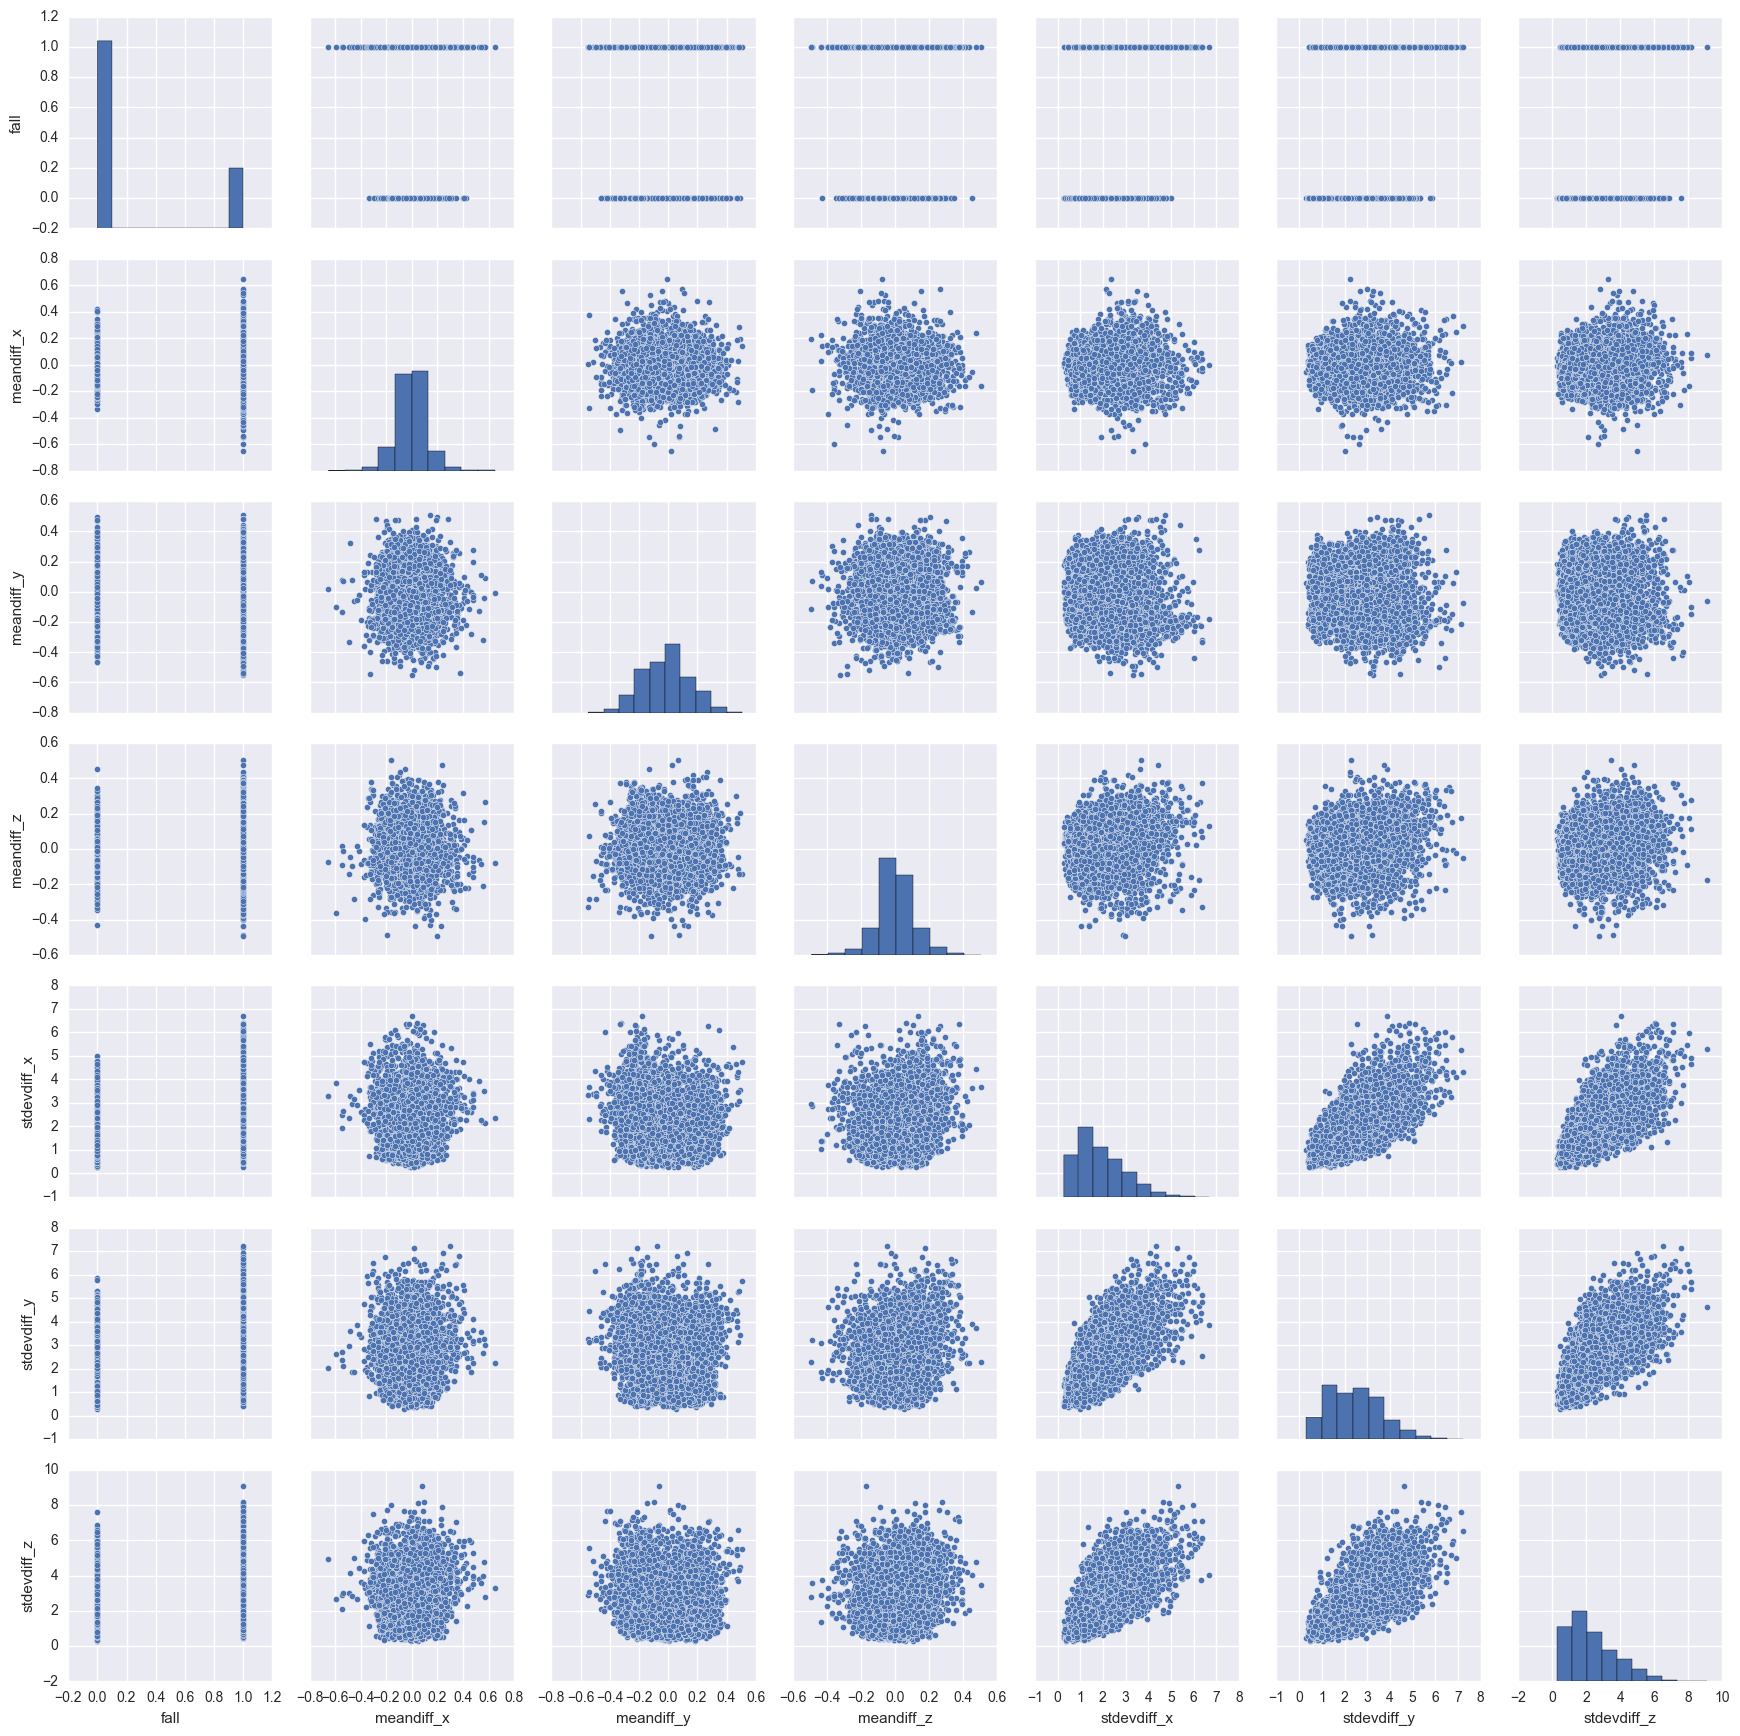

In [34]:
g = sns.pairplot(data[['fall', 'meandiff_x', 'meandiff_y', 'meandiff_z','stdevdiff_x','stdevdiff_y','stdevdiff_z']])

Time differencing seems to bring out more info.. Now there is a noticably difference distributions between falls and adl. It also looks that many stdev_diff in x and y and z are correlated to each other. So this looks promising. We need to apply some machine learning algo and might be able to find good predictive features   

### Is there a correlation between a binary FALL/No FAll variable and independent features?  

For now let's just calulcate a correlation in naive way, taking FALL to be 1 and ADL to be 0

In [35]:
data.corr()

,fall,mean_x,mean_y,mean_z,stdev_x,stdev_y,stdev_z,meandiff_x,meandiff_y,meandiff_z,stdevdiff_x,stdevdiff_y,stdevdiff_z
fall,1.000000,-0.064373,-0.082266,0.168106,0.609353,0.269514,0.707564,-0.017303,-0.117623,0.145735,0.502537,0.322573,0.425621
mean_x,-0.064373,1.000000,-0.004093,-0.048126,-0.032129,0.041053,-0.015208,0.166478,-0.017286,0.009562,-0.003765,0.038005,0.035142
mean_y,-0.082266,-0.004093,1.000000,0.065013,-0.052147,-0.009486,-0.103768,0.007761,0.138578,0.034929,-0.092966,-0.065817,-0.057083
mean_z,0.168106,-0.048126,0.065013,1.000000,0.059775,0.006031,0.165235,-0.000752,-0.013725,0.271725,0.168301,0.195508,0.169433
stdev_x,0.609353,-0.032129,-0.052147,0.059775,1.000000,0.528912,0.666501,-0.025426,-0.116845,0.093106,0.779015,0.514652,0.614066
stdev_y,0.269514,0.041053,-0.009486,0.006031,0.528912,1.000000,0.488895,0.005628,-0.062859,0.030588,0.611813,0.718711,0.607172
stdev_z,0.707564,-0.015208,-0.103768,0.165235,0.666501,0.488895,1.000000,-0.019504,-0.131581,0.150127,0.655726,0.529360,0.724127
meandiff_x,-0.017303,0.166478,0.007761,-0.000752,-0.025426,0.005628,-0.019504,1.000000,0.012600,-0.046385,-0.041798,0.008296,0.002837
meandiff_y,-0.117623,-0.017286,0.138578,-0.013725,-0.116845,-0.062859,-0.131581,0.012600,1.000000,-0.000735,-0.129290,-0.068516,-0.133177
meandiff_z,0.145735,0.009562,0.034929,0.271725,0.093106,0.030588,0.150127,-0.046385,-0.000735,1.000000,0.145790,0.140149,0.117014


Looks that there is indeed some statistically significant correlation of FALL vaiable for the stdev and stdev of differences ( 40 - 70 % )  